In [1]:
import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [2]:
# Preprocess the data: Reshape images
# Images are 28x28 grayscale, so we add a channel dimension of 1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Shape of x_train after reshaping: {x_train.shape}")
print(f"Shape of x_test after reshaping: {x_test.shape}")

Shape of x_train after reshaping: (60000, 28, 28, 1)
Shape of x_test after reshaping: (10000, 28, 28, 1)


In [3]:
# Preprocess the data: Normalize pixel values
# Convert pixel values from [0, 255] to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(f"Min pixel value in x_train after normalization: {x_train.min()}")
print(f"Max pixel value in x_train after normalization: {x_train.max()}")

Min pixel value in x_train after normalization: 0.0
Max pixel value in x_train after normalization: 1.0


In [4]:
# Preprocess the data: One-hot encode labels
# Convert integer labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")
print(f"Example of one-hot encoded label (first training label): {y_train[0]}")

Shape of y_train after one-hot encoding: (60000, 10)
Shape of y_test after one-hot encoding: (10000, 10)
Example of one-hot encoded label (first training label): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Define the Neural Network Model
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)), # Input layer: Flattens 28x28x1 images to a 784-element vector
    Dense(128, activation='relu'),   # Hidden layer: 128 neurons with ReLU activation
    Dense(10, activation='softmax')  # Output layer: 10 neurons (for 10 classes) with Softmax activation
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, Categorical Crossentropy loss, and Accuracy metric.")


Model compiled successfully with Adam optimizer, Categorical Crossentropy loss, and Accuracy metric.


In [7]:
# Train the Model
print("\nStarting model training...")
history = model.fit(
    x_train, y_train,
    epochs=10,        # Number of times to iterate over the entire training dataset
    batch_size=128,   # Number of samples per gradient update
    validation_data=(x_test, y_test) # Data to evaluate the loss and metrics on at the end of each epoch
)

print("\nModel training completed.")


Starting model training...
Epoch 1/10


469/469 [==============================] - 2s 3ms/step - loss: 0.3503 - accuracy: 0.9037 - val_loss: 0.2015 - val_accuracy: 0.9420
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1669 - accuracy: 0.9519 - val_loss: 0.1377 - val_accuracy: 0.9601
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1216 - accuracy: 0.9648 - val_loss: 0.1117 - val_accuracy: 0.9672
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9726 - val_loss: 0.0969 - val_accuracy: 0.9704
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9775 - val_loss: 0.0914 - val_accuracy: 0.9720
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9814 - val_loss: 0.0894 - val_accuracy: 0.9721
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9850 - val_loss: 0.0758


Evaluating model on test data...
Test Loss: 0.0736
Test Accuracy: 0.9770

Making predictions on a few test images...
1/1 [==============================] - 0s 84ms/step


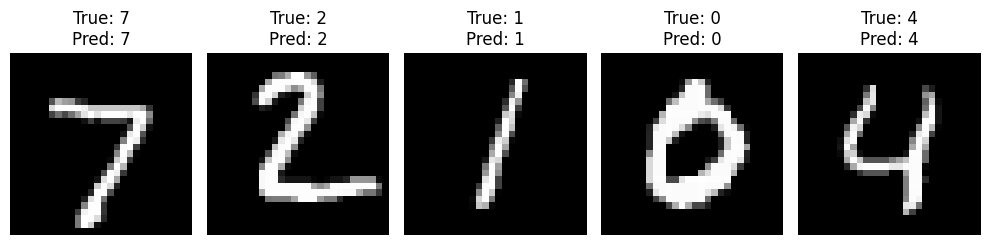


Inference test completed. Predicted vs. True labels for 5 samples displayed.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test data
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict a few test images
print("\nMaking predictions on a few test images...")
predictions = model.predict(x_test[:5]) # Predict on the first 5 test images

# Display images and predictions
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\nInference test completed. Predicted vs. True labels for 5 samples displayed.")

In [9]:
import os

# Calculate model memory footprint
# Save the model to a temporary file to get its size on disk
model_filename = "mnist_baseline_model.h5"
model.save(model_filename)
model_size_bytes = os.path.getsize(model_filename)
model_size_kb = model_size_bytes / 1024
model_size_mb = model_size_kb / 1024

print(f"\nModel File Size: {model_size_bytes} bytes ({model_size_kb:.2f} KB, {model_size_mb:.2f} MB)")

# To remove the temporary file after checking its size
os.remove(model_filename)

# Estimate memory for inference (weights and activations)
# Parameters (weights and biases) are already calculated in model.summary()
total_params = model.count_params()
# Assuming float32 (4 bytes per parameter)
weights_memory_bytes = total_params * 4
weights_memory_kb = weights_memory_bytes / 1024
weights_memory_mb = weights_memory_kb / 1024

print(f"Total Model Parameters: {total_params}")
print(f"Estimated Memory for Weights (float32): {weights_memory_bytes} bytes ({weights_memory_kb:.2f} KB, {weights_memory_mb:.2f} MB)")

# Estimating activation memory for a single inference:
# Input layer: 28*28*1 * 4 bytes/pixel (float32)
# Flatten layer output: 784 * 4 bytes
# Dense layer 1 output: 128 * 4 bytes
# Dense layer 2 output: 10 * 4 bytes
input_mem = 28 * 28 * 1 * 4
flatten_output_mem = 784 * 4
dense1_output_mem = 128 * 4
dense2_output_mem = 10 * 4
total_activation_mem_single_inference = input_mem + flatten_output_mem + dense1_output_mem + dense2_output_mem

print(f"Estimated Peak Activation Memory for single inference: {total_activation_mem_single_inference} bytes ({total_activation_mem_single_inference / 1024:.2f} KB)")


Model File Size: 1247056 bytes (1217.83 KB, 1.19 MB)
Total Model Parameters: 101770
Estimated Memory for Weights (float32): 407080 bytes (397.54 KB, 0.39 MB)
Estimated Peak Activation Memory for single inference: 6824 bytes (6.66 KB)


c:\Users\shwet\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import os

# Calculate model memory footprint
# Save the model to a temporary file to get its size on disk
model_filename = "mnist_baseline_model.h5"
model.save(model_filename)
model_size_bytes = os.path.getsize(model_filename)
model_size_kb = model_size_bytes / 1024
model_size_mb = model_size_kb / 1024

print(f"\nModel File Size: {model_size_bytes} bytes ({model_size_kb:.2f} KB, {model_size_mb:.2f} MB)")

# To remove the temporary file after checking its size
os.remove(model_filename)

# Convert the Keras model to a TensorFlow Lite model with full integer quantization

# Re-save the model in the native Keras format (recommended by TensorFlow warning)
keras_model_path = "mnist_baseline_model.keras"
model.save(keras_model_path)
print(f"\nKeras model saved to {keras_model_path}")

# Load the model from the native Keras format for conversion
loaded_model = keras.models.load_model(keras_model_path)

# Create a TensorFlow Lite converter
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

# Enable full integer quantization
# This will quantize weights and activations to int8.
# It requires a representative dataset for calibration to determine min/max ranges for activations.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Provide a representative dataset for calibration
# The representative dataset should consist of a small subset of your training data.
# TFLite uses this to calibrate the dynamic ranges for activations.
def representative_data_gen():
    for input_value in x_train: # Using x_train, which is already normalized and reshaped
        yield [input_value]

converter.representative_dataset = representative_data_gen

# Ensure that input and output tensors are also quantized to int8
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Convert the model
tflite_model_quant = converter.convert()

# Save the quantized TFLite model
tflite_model_quant_filename = "mnist_quantized_model.tflite"
with open(tflite_model_quant_filename, "wb") as f:
    f.write(tflite_model_quant)

print(f"\nQuantized TFLite model saved to {tflite_model_quant_filename}")

# Optional: Check the size of the quantized model
tflite_model_quant_size_bytes = os.path.getsize(tflite_model_quant_filename)
tflite_model_quant_size_kb = tflite_model_quant_size_bytes / 1024
print(f"Quantized TFLite Model Size: {tflite_model_quant_size_bytes} bytes ({tflite_model_quant_size_kb:.2f} KB)")

# Clean up the temporary .keras file
os.remove(keras_model_path)
print(f"Cleaned up temporary Keras model file: {keras_model_path}")

c:\Users\shwet\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Model File Size: 1247056 bytes (1217.83 KB, 1.19 MB)

Keras model saved to mnist_baseline_model.keras
INFO:tensorflow:Assets written to: C:\Users\shwet\AppData\Local\Temp\tmpfexi95xv\assets


INFO:tensorflow:Assets written to: C:\Users\shwet\AppData\Local\Temp\tmpfexi95xv\assets
c:\Users\shwet\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(



Quantized TFLite model saved to mnist_quantized_model.tflite
Quantized TFLite Model Size: 104496 bytes (102.05 KB)
Cleaned up temporary Keras model file: mnist_baseline_model.keras
